Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

create a notebook named model.ipynb.

#### run all your previous scripts that acquired, prepared, split, and scaled your data.

In [294]:
import wrangle
import split_scale
import features

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [257]:
#acquire data
df = wrangle.wrangle_telco()
df.drop(columns = "customer_id", inplace=True)
df["dummy_col"] = 1

In [273]:
#split data
train, test = split_scale.split_my_data(df,.80)
X_train_unscaled = train.drop(columns="total_charges")
y_train = train["total_charges"]
X_test_unscaled = test.drop(columns="total_charges")
y_test = test["total_charges"]

In [274]:
#scale X data only
X_train_scaled, X_test_scaled, scaler = split_scale.standard_scaler(X_train, X_test)

#### select your features using your features script

In [276]:
selected_features = features.select_kbest_freg_scaled(X_train_scaled, y_train, 2)
X_train, X_test = features.features_to_X_train_and_test(selected_features)

fit 2 different linear models to your data

In [277]:
lm1 = LinearRegression()

In [278]:
lm1.fit(X_train, y_train)
print("Linear Model:", lm1)

lm1_y_intercept = lm1.intercept_
print("intercept: ", lm1_y_intercept)

lm1_coefficients = lm1.coef_
print("coefficients: ", lm1_coefficients)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  3740.53690652819
coefficients:  [2124.43276129  741.9671209 ]


In [279]:
print('{} = b + m1 * {} + m2 * {}'.format(y_train.name[0], X_train.columns[0],X_train.columns[1]))
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0])
print('    coefficient (m2): %.2f' % lm1_coefficients[1])

t = b + m1 * monthly_charges + m2 * tenure
    y-intercept  (b): 3740.54
    coefficient (m1): 2124.43
    coefficient (m2): 741.97


In [280]:
y_pred_lm1 = lm1.predict(X_train)

In [281]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the target can be explained by the optimal features '.format(r2_lm1))

linear model
  mean squared error: 2.41e+05
  96.36% of the variance in the target can be explained by the optimal features 


evaluate the 2 models and your baseline

In [282]:
y_pred_baseline = np.array([y_train.mean()]*len(y_train))
MSE = mean_squared_error(y_train, y_pred_baseline)
SSE = MSE*len(y_train)
RMSE = sqrt(MSE)

evs = explained_variance_score(y_train, y_pred_baseline)

print('sum of squared errors\n model: {:.5}'.format(SSE))
print('  {:.2%} of the variance in the target can be explained by the optimal features.'.format(evs))

sum of squared errors
 model: 8.908e+09
  0.00% of the variance in the target can be explained by the optimal features.


In [296]:
train_pred = X_train_unscaled[selected_features]
train_pred['total_charges'] = y_pred_lm1
y_lm1_unscaled = train_pred['total_charges']

train_pred_baseline = X_train_unscaled[selected_features]
train_pred_baseline['total_charges'] = y_pred_baseline
y_baseline_unscaled = train_pred_baseline['total_charges']

In [301]:
y_train.describe()

count    1348.000000
mean     3740.536907
std      2571.617986
min        20.350000
25%      1277.275000
50%      3734.700000
75%      5987.675000
max      8672.450000
Name: total_charges, dtype: float64

Text(0.5, 1, 'Predicted vs Actual Final Grade')

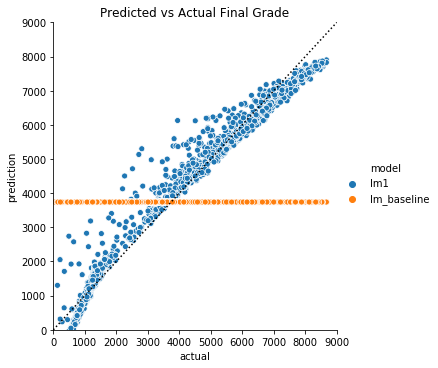

In [303]:
pd.DataFrame({'actual': y_train,
              'lm1': y_lm1_unscaled.ravel(),
              'lm_baseline': y_baseline_unscaled.ravel()})\
.melt(id_vars=['actual'], var_name='model', value_name='prediction')\
.pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

min, max = 0, 9000
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')

select the one that performed the best

apply to your test data

Write a function that creates the model object, fits and predicts, given X_train, X_test, y_train, y_test

Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot.

Write a function, plot_regression(x, y) that takes a feature and a target and returns the datapoints, the regression line, and the confidence interval. (only plotting a single feature with y) (hint: confidence interval - take advantage of things already written)